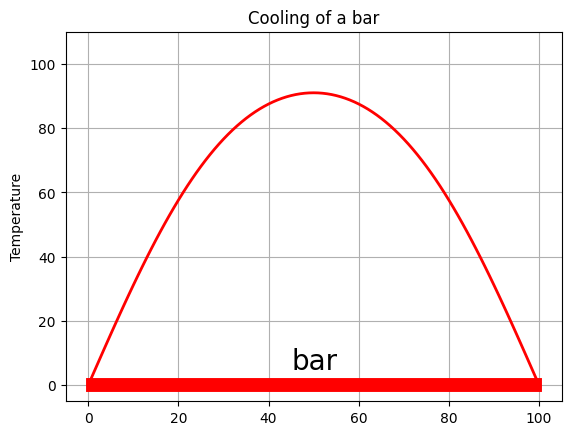

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


Nx = 101
Dx = 0.01414
Dt = 0.6

KAPPA = 210.    # Thermal conductivity
SPH = 900.      # Specific heat
RHO = 2700.     # Density

cons = KAPPA / (SPH*RHO) * Dt / (Dx*Dx)     # Set up the figure, the axis, and the plot element we want to animate
T = np.zeros((Nx, 2), dtype=float)          # Temp @ first 2 times

k = np.arange(0, Nx, 1)


# plot the initial temperature distribution
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-5, 105), ylim=(-5, 110.0))

ax.set_title("Cooling of a bar")
ax.set_ylabel("Temperature")
ax.grid()


line, = ax.plot(k, T[k, 0], "r", lw=2)
ax.plot([1, 99], [0, 0], "r", lw=10)
ax.text(45, 5, 'bar', fontsize=20)


def init():
    T[1:Nx-1, 0] = 100.0                        # Initial temperature
    T[[0, 0, Nx-1, Nx-1], [0, 1, 0, 1]] = 0.0   # Bar ends T = 0
    return line,


def animate(frames):
    T[1:Nx-1, 1] = T[1:Nx-1, 0] + cons * (T[2:Nx, 0] + T[0:Nx-2, 0] - 2.0 * T[1:Nx-1, 0])
    line.set_data(k, T[k, 1])
    T[1:Nx-1, 0] = T[1:Nx-1, 1]  # Row of 100 positions at 't = m'
    return line,


time = 120  # lasting time


# animation
ani = animation.FuncAnimation(fig=fig, init_func=init, func=animate, frames=np.linspace(0, time, 10*time), interval=100, blit=True)
ani.save('heatAnimation.gif', writer='pillow', fps=24)
